 <h1 align="center">Data Preprocesing and Initial Analysis</h1>
 

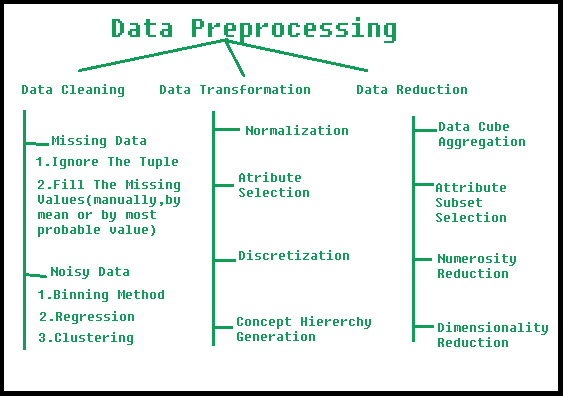


It is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors. That is why we need to preprocess data before sending through a model.. Among all projects we will use a database gathered from Coffee Quality Institute (CQI). This data has a lot of information relevant and irrelevant for the general objective. In addition, missing or incomplete data can provke many problems in the following analisys. 

- Read data
- Checking for missing values
- Checking for categorical data (histogram, correlogram)
- Standardize the data
- PCA Analisys

### Principal Component Analysis (PCA)

This technique used in exploratory data analysis and for multidimensionality reduction. The main idea is to project data points onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data’s variation as possible. In other words, using PCA we remove the redundant and highly-correlated data and we keep only the most significant data features for further analysis.

# Task
This project analyzes the data on the quality of Arabica coffee, with the aim of finding a relationship between coffee production parameters and the results of cup quality evaluation. The first part will filter the data and analyze the histograms and chorelograms of all parameters. In the second part, a PCA analysis of the information will be performed.

### Cool Coffee Fact. High altitude coffee.

Why Colombia and Guatemala produce high quality coffee? Both countries have similar environmental condition and produce "high altitude coffee". The term high altitude coffee refers to the climate and altitude where the plant was grown. This characteristic is very important, since it directly influences the size, shape and flavor of the coffee. As the coffee plantation grows at different altitudes with respect to the sea, the humidity changes, as well as the vegetation and fauna. These elements influence the dynamics and interactions of the agroecosystem. The minimum altitude at which the coffee plantation must grow to be considered high altitude coffee is 900 meters above sea level. High altitude coffee beans are denser, this is partly due to the slow growth that occurs in a high altitude environment. The seeds should have a closed zig-zag or slightly crooked crack.A coffee grown at a lower altitude has denser grains and a semi-open crack. The height also influences the flavor, one of the most appreciated characteristics, when the coffee grows at a higher altitude and is well cared for, it will result in a cup with greater acidity, it will be more aromatic and tasty.

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np 
import pandas as pd 
import seaborn as sns
import math

cafe = pd.read_csv("arabica_data_cleaned.csv") 
cafe.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


---

### Viewing the DataFrame
There are 44 columns in the data set. 

---

In [24]:
print (cafe.columns)
print (cafe['altitude_mean_meters'].value_counts())


Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')
1200.0    66
1100.0    52
1400.0    52
1300.0    50
1500.0    44
          ..
1473.0     1
3800.0     1
1425.0     1
1325.0     1
1676.5     1
Name: altitude_mean_meters, Length: 201, dtype: int64


In [25]:
print (cafe.isna().sum())
duplicates = cafe[cafe.duplicated()]
print('\nTotal duplicates:', len(duplicates))


Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

---
Some parameters do not have information (NaN) in the different columns. The main problem is the parameter Lot Number, which will not be considered in this or further analysis. I also check if there are duplicates in the database

---

### Organizing data and extracting the important 


A partir de la informacion original se escogen los parametros que van a ser considerados en este y lossiguientes analisis desarrollados a lo largo de los diferentes proyectos. Asi las cosas, se exporto la base de datos organizada y limpia con los parametros deseados, la cual sera el estandar para los siguientes proyectos de aula. 



In [23]:
new_df = cafe[["altitude_mean_meters","Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Variety",
       "Balance", "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points", "Moisture", "Country.of.Origin", 
             "Category.One.Defects", "Category.Two.Defects", "Total.Cup.Points" ]]
new_df.dropna(inplace=True)
temp=new_df[new_df["Total.Cup.Points"]<=70].index
cafe_2=new_df.drop(temp)
temp=cafe_2[cafe_2["altitude_mean_meters"]>=3000].index
cafe_3=cafe_2.drop(temp)
cafe_3.to_csv(r'C:\Users\Windows 10\Desktop\RICE\SECOND SEMESTER\INDE 577 MACHINE LEARNING\Project\coffee_data.csv')


<ipython-input-23-6188d87e69c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


Cup values less than 70 points are eliminated, since a high-quality coffee must have a score of 70 or higher. Altitude values greater than 3000 meters above sea level are also eliminated. Some cup data with unrealistic altitudes were observed, possibly due to typographical errors.

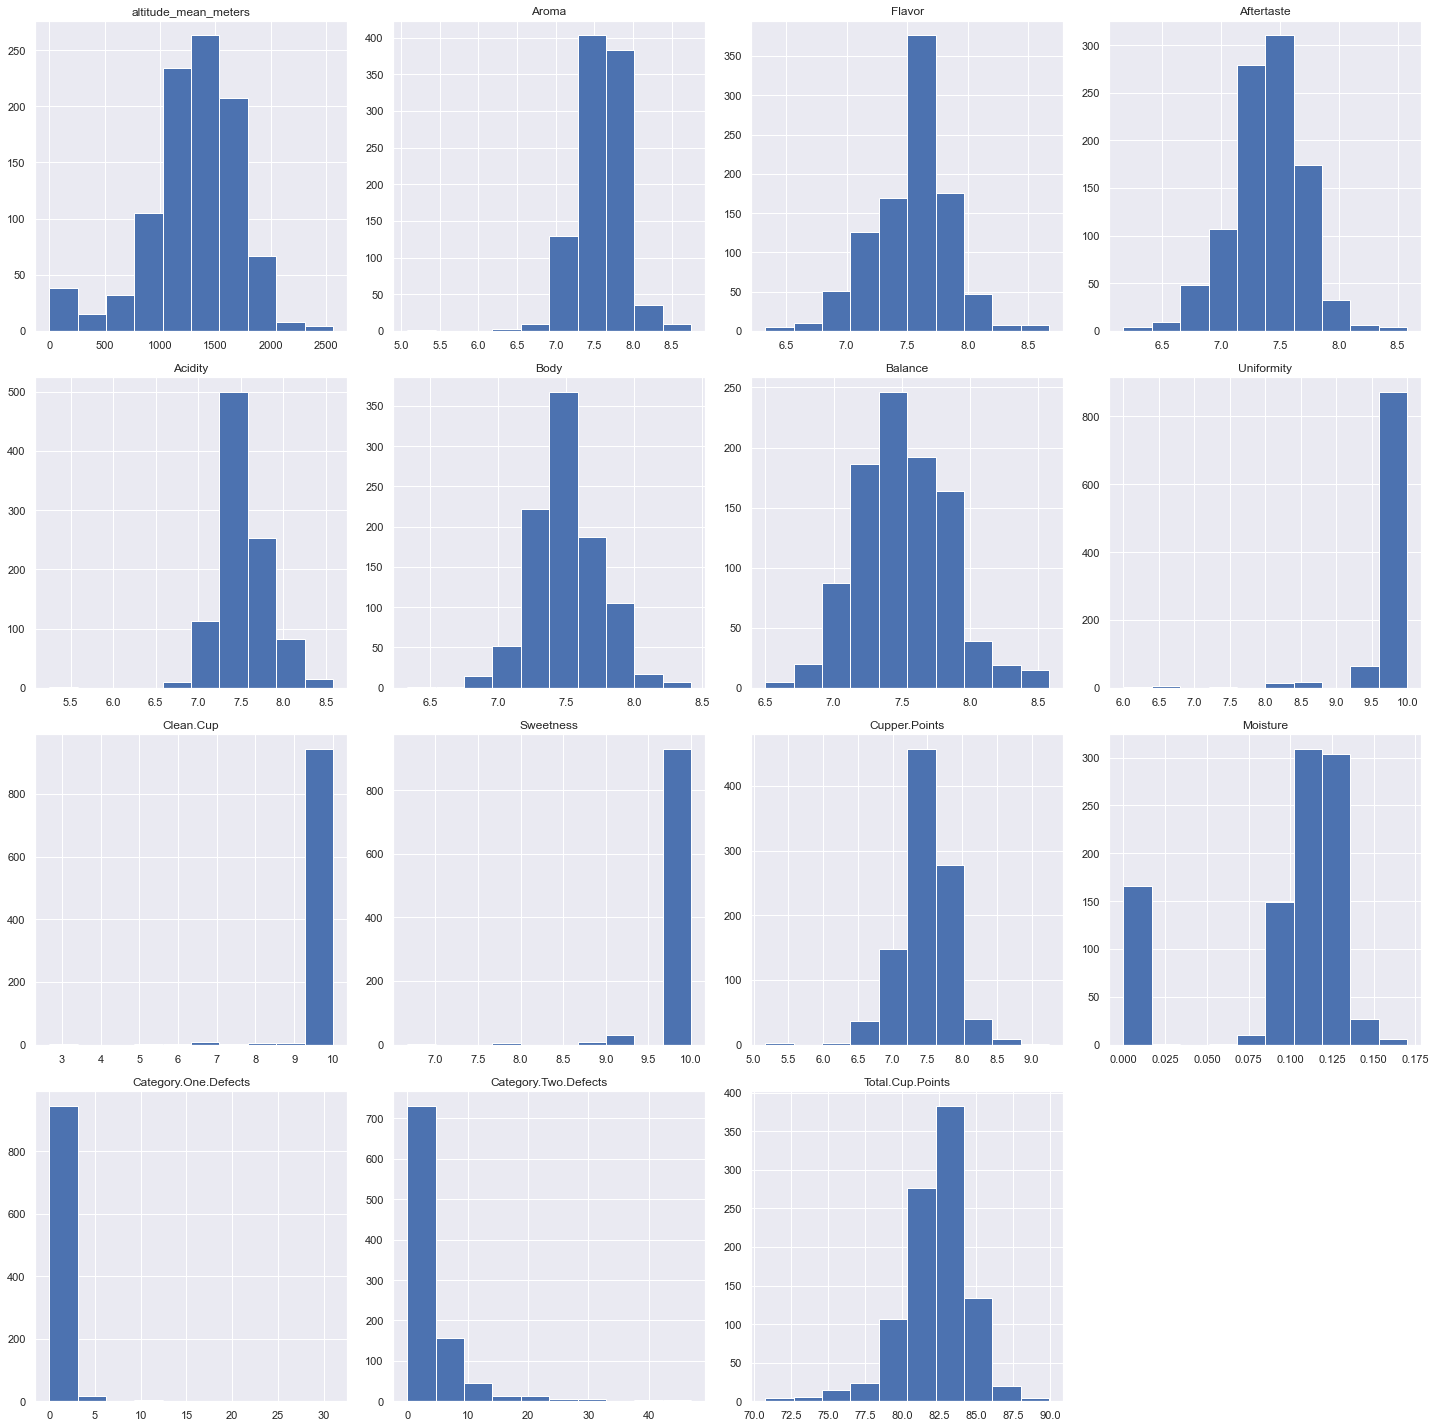

In [24]:
cafe_3.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

The parameters:  moisture and category 1 and 2 defects are within the established quality standard. If they are within the ranges, they do not affect the quality levels in the cup (moisture less than 15%, type 1 defects less than 30, type two defects less than 50). For these reason, these prameters are discarted from the analisys. 

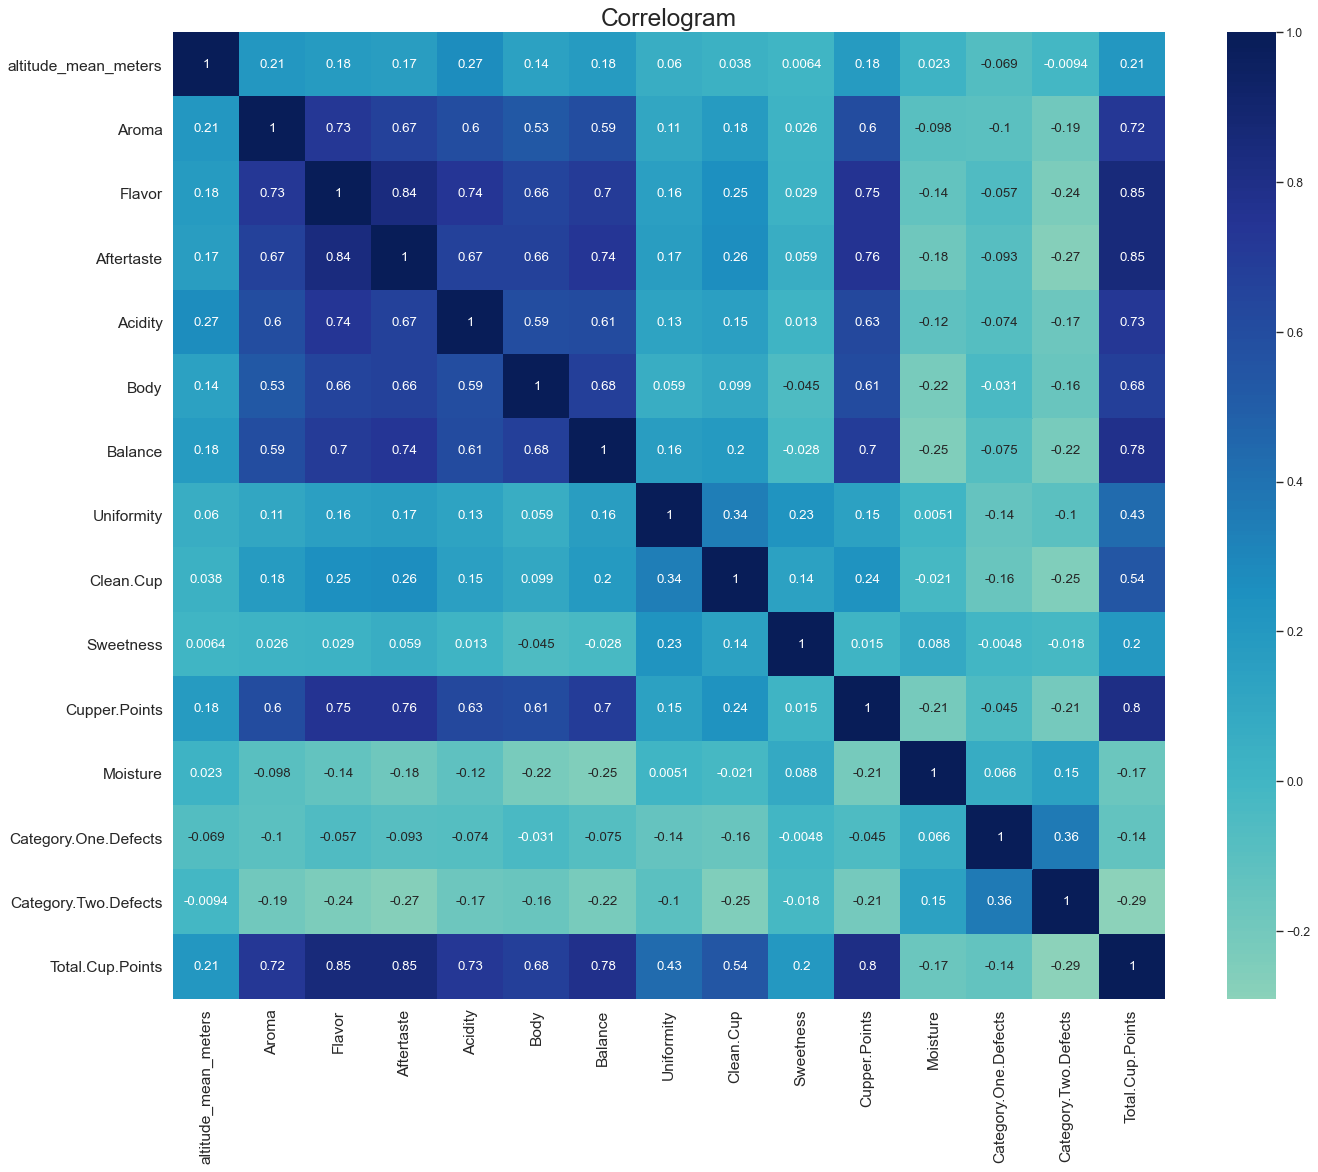

In [19]:
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(cafe_3.corr(), xticklabels=cafe_3.corr().columns, yticklabels=cafe_3.corr().columns, cmap='YlGnBu', 
            center=0, annot=True)

# Decorations
plt.yticks(fontsize=14)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=14)
plt.show()

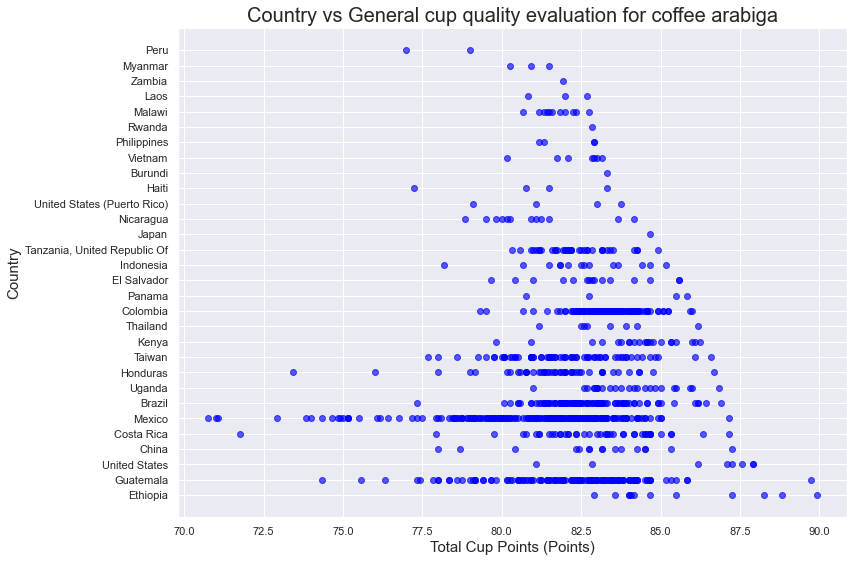

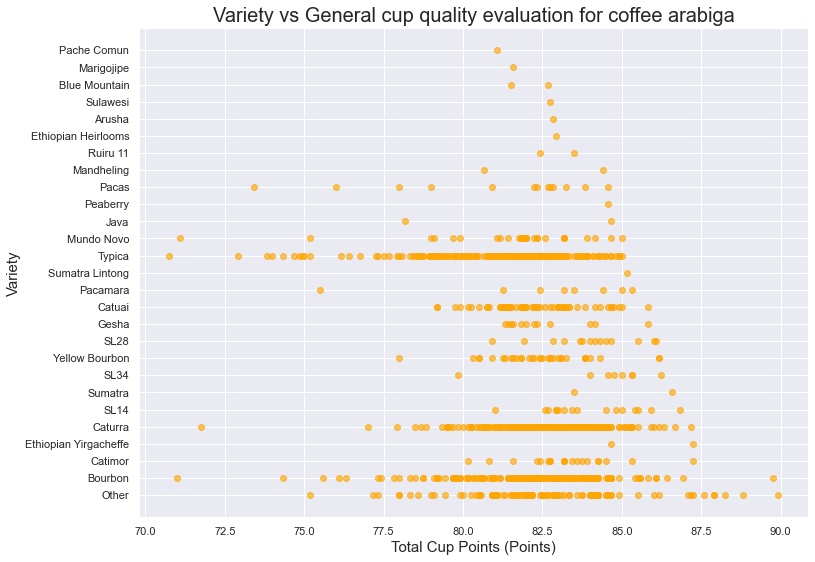

In [37]:
sns.set_theme()
X = []
y = []
z = []
v = []


#print (cafe_2.info())
for i, test_string in enumerate(cafe_3.altitude_mean_meters):
    try :
        float(test_string)
        X.append(float(test_string))
        y.append(cafe_3["Total.Cup.Points"].iloc[i])
        z.append(cafe_3["Country.of.Origin"].iloc[i])
        v.append(cafe_3["Variety"].iloc[i])
        
    except :
        None
#plt.figure(figsize = (12, 9))
#plt.scatter(X, y, color = "magenta", alpha = 0.65)
#plt.xlabel("Altitude (meters above sea level)", fontsize = 15)
#plt.title ("Altitude vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
#plt.ylabel("Total Cup Points (Points)", fontsize = 15)
#plt.show()
#cafe_3.isna().sum()  

plt.figure(figsize = (12, 9))
plt.scatter(y, z, color = "blue", alpha = 0.65)
plt.xlabel("Total Cup Points (Points)", fontsize = 15)
plt.title ("Country vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
plt.ylabel("Country", fontsize = 15)
plt.show()


plt.figure(figsize = (12, 9))
plt.scatter(y, v, color = "orange", alpha = 0.65)
plt.xlabel("Total Cup Points (Points)", fontsize = 15)
plt.title ("Variety vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
plt.ylabel("Variety", fontsize = 15)
plt.show()


The graphs above show the variation in cup evaluation values for different countries and coffee varieties. The fluctuations in the values ​​are quite pronounced, as well as the amount of data for each country and variety. This adds additional complexity to the study. In order to have consistency in the information, three countries with similar amounts of data but relatively different environmental conditions and coffee quality will be selected. In this case the selected countries are Colombia, Guatemala and Taiwan.

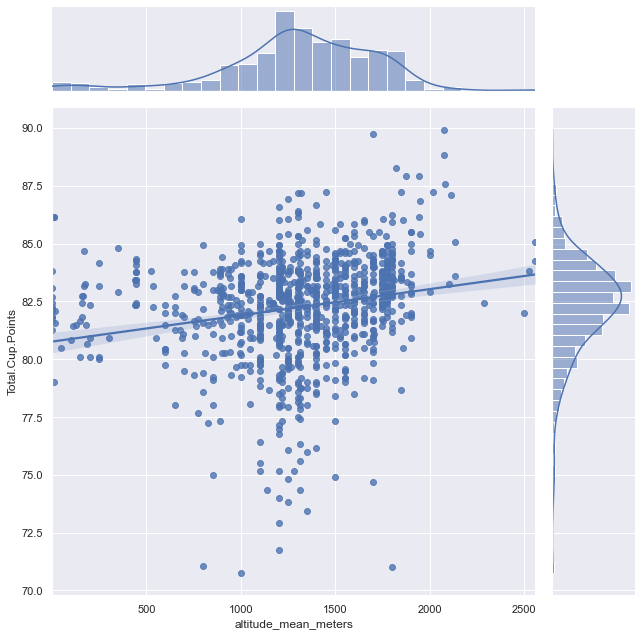

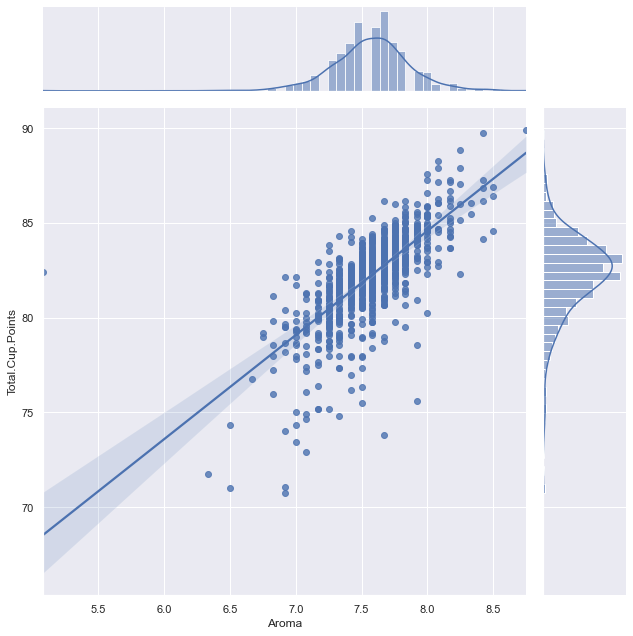

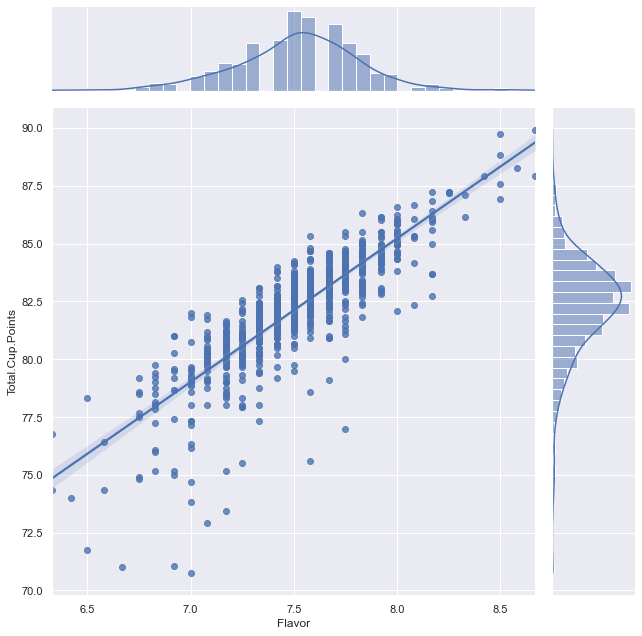

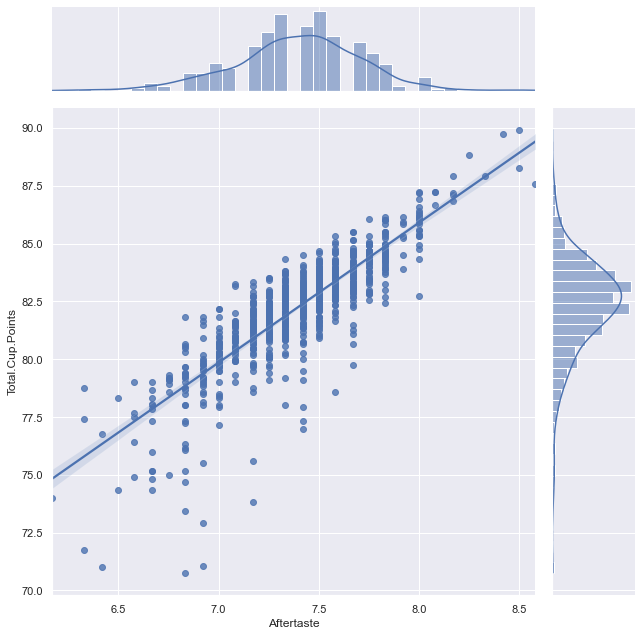

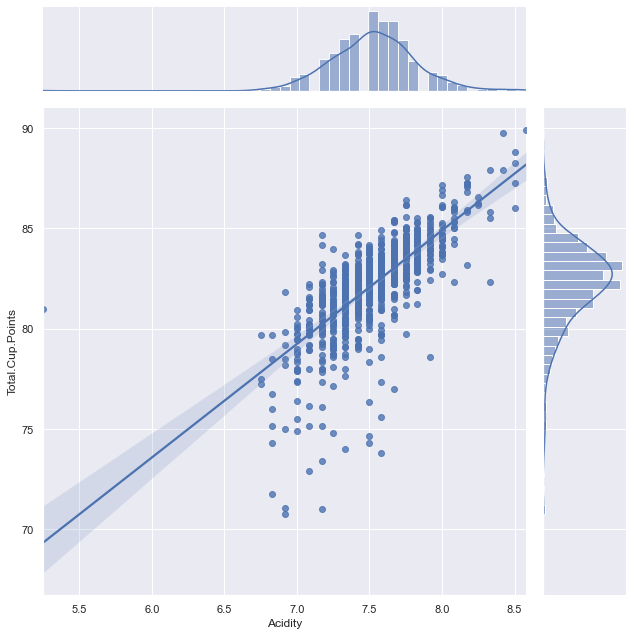

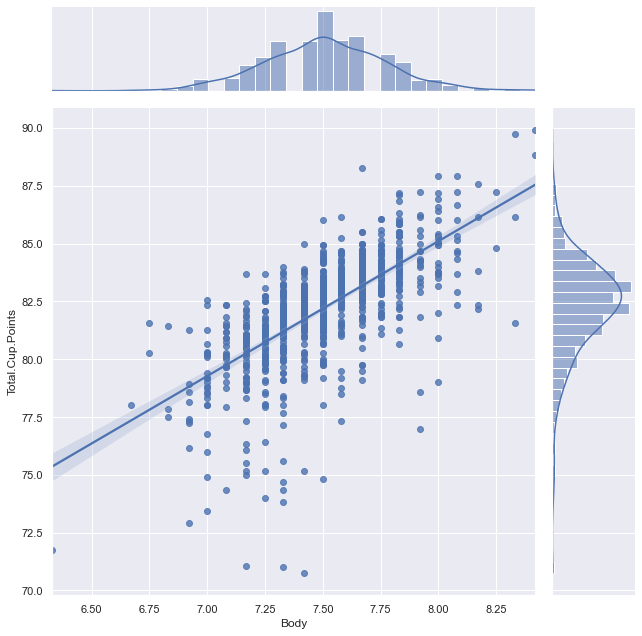

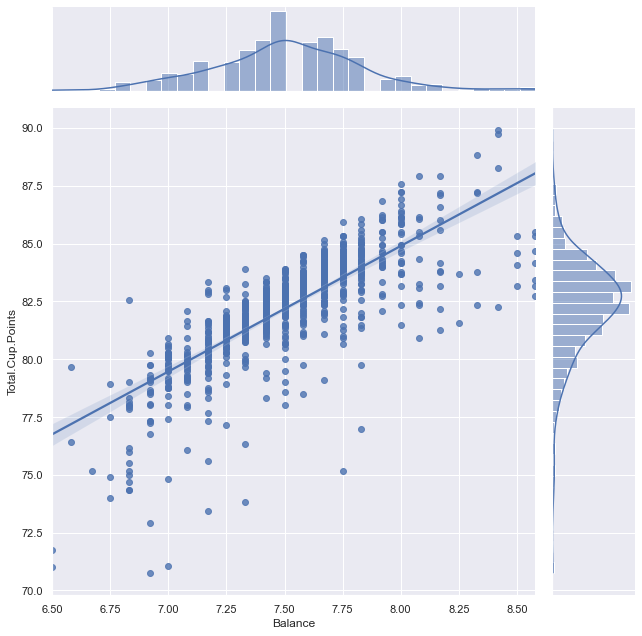

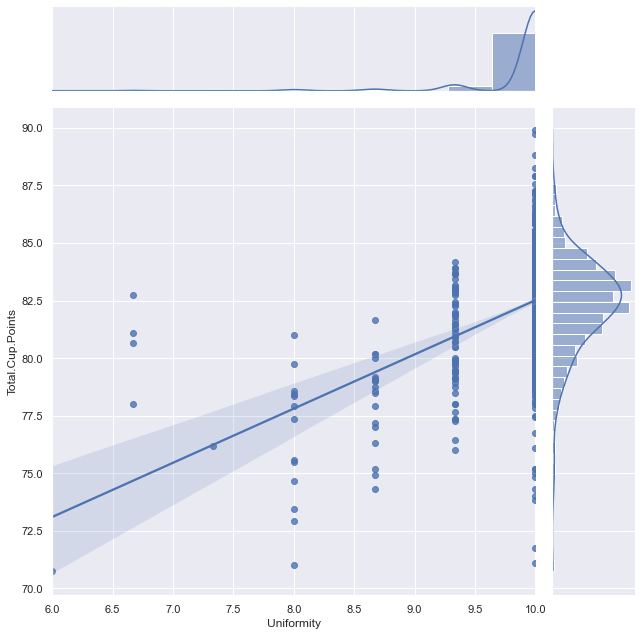

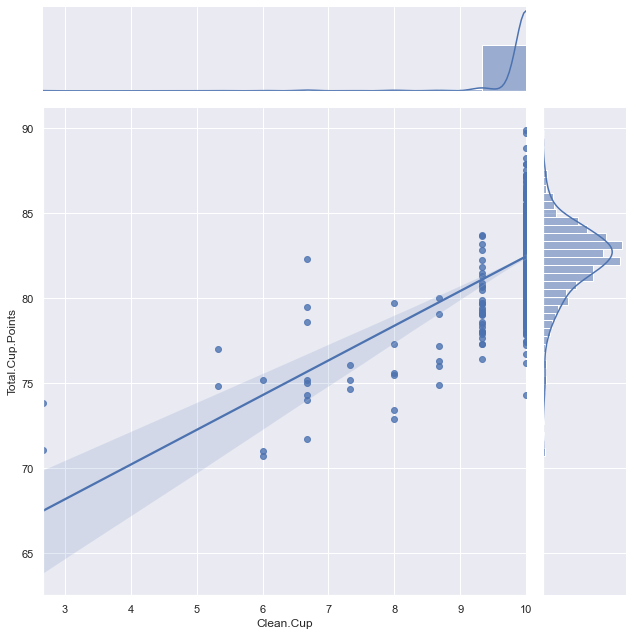

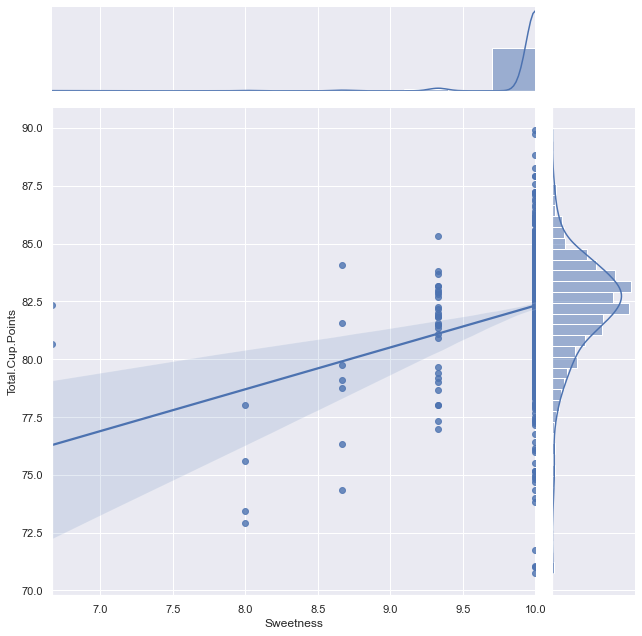

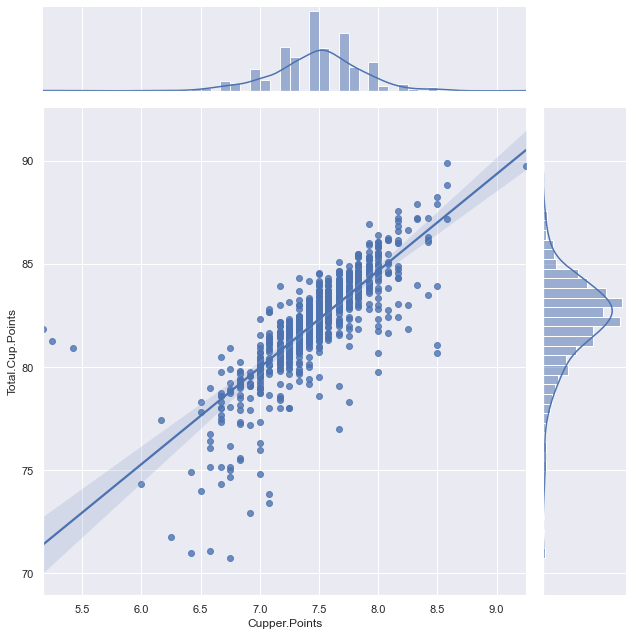

In [38]:
# Define list of continuous variables
continous_features = ["altitude_mean_meters","Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance", 
                      "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points"]

#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = cafe_3[feature], y = cafe_3['Total.Cup.Points'], kind = 'reg', height=9)

It can be seen a direct relationship between all the selected parameters and the total cup points. The parameters with the highest correlation are: Flavor, aftertaste and balance. Although the influence of altitude on the quality of the rate is positive, it is less than all tother parameters. However, altitude is an environmental parameter of coffee production. For that reason it will be taken into account as one of the most important values of analysis. 

### PCA Analysis 
For this part scikit-learn libray, PCA module is used

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing


sns.set_theme()

iris = sns.load_dataset("iris")
cafe_3.rename(columns = {'Country.of.Origin':'country', 'Total.Cup.Points':'Total_points'}, inplace = True)

values=['Guatemala','Colombia', 'Taiwan']
cafe_filter= cafe_3[cafe_3.country.isin(values)]

X = cafe_filter[["altitude_mean_meters", "Flavor", "Aroma", "Aftertaste", "Acidity", "Body", "Balance", 
                      "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points"]].to_numpy()
y = cafe_filter.country.to_numpy()


In [62]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (340, 11)
np.shape(sigma) = (11,)
np.shape(Vt) = (11, 11) 



In [63]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [64]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]
PC5 = Vt.T[:, 4]
PC6 = Vt.T[:, 5]
PC7 = Vt.T[:, 6]
PC8 = Vt.T[:, 7]
PC9 = Vt.T[:, 8]
PC10 = Vt.T[:, 9]
PC11 = Vt.T[:, 10]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

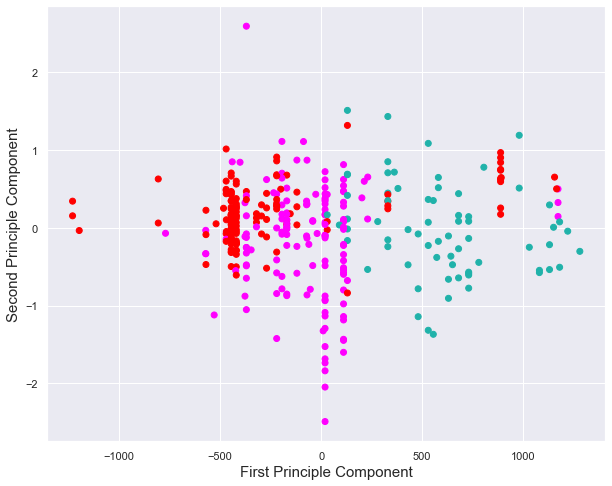

In [84]:
def colors(y):
    if y == "Colombia":
        return "red"
    elif y == "Guatemala":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component", fontsize = 15)
plt.show()

#### Colombia present the most complicated points in the plot

In [66]:
scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.41152997 0.16749442 0.08595105 0.06830937 0.05422708 0.05161134
 0.04806916 0.03524595 0.03223555 0.02600739 0.01931873]
per_var = [41.15 16.75  8.6   6.83  5.42  5.16  4.81  3.52  3.22  2.6   1.93] 



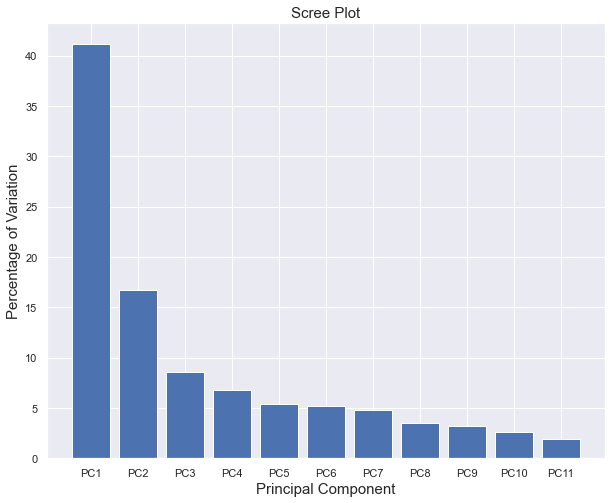

In [67]:
labels = [f"PC{i}" for i in range(1,12)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 12), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [69]:
features=["altitude_mean_meters", "Flavor", "Aroma", "Aftertaste", "Acidity", "Body", "Balance", 
                      "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points", ]
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
altitude_mean_meters,0.163581,0.408212,0.312963,0.396887,0.331160,0.367950,0.363896,0.111189,0.080475,0.071952,0.386844
Flavor,0.074842,0.014781,0.098461,-0.016479,0.068101,0.128978,0.065405,-0.559383,-0.568827,-0.566714,0.032026
Aroma,-0.931727,0.105863,0.078425,0.216799,-0.172010,0.135443,0.068472,-0.119446,0.013614,0.008221,-0.019611
Aftertaste,0.049610,-0.270844,-0.614263,0.047146,-0.252783,0.305973,0.449920,0.000794,0.261118,-0.268377,0.210912
Acidity,0.104792,-0.044608,0.306592,0.119384,-0.684698,-0.062409,0.119411,0.474038,-0.374089,-0.105496,0.126603
Body,-0.188093,0.125047,-0.111065,-0.030822,0.330208,-0.241688,-0.225503,0.504048,0.080788,-0.649350,0.187486
Balance,-0.096711,0.067206,-0.535554,0.085669,0.216322,-0.002756,-0.046654,0.198245,-0.651181,0.381762,0.184157
Uniformity,0.087260,0.190568,-0.144640,0.340908,-0.263444,-0.481524,-0.266350,-0.372415,0.164615,0.041693,0.528385
Clean.Cup,-0.161886,-0.194613,0.187468,-0.403285,0.178821,-0.498336,0.587590,-0.052785,-0.047590,0.111034,0.308510
Sweetness,0.082596,0.115022,-0.139657,0.524134,0.075784,-0.439679,0.386310,0.015575,-0.028101,-0.091507,-0.572735


According to the PCA analysis, there are three parameters qith the highest influence in the data base. We will keep Altitude, balance, aftertaste, aroma and flavor as the principal parameters to clasify coffee quality.IN addition, the claned data base called coffee_data is saved as a csv file and added to the github folder. 